In [2]:
import magpylib as magpy
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial.transform import Rotation as R

In [3]:
import numpy as np
import magpylib as magpy

N = 10
angles = np.linspace(0, 360, N, endpoint=False)

halbach = magpy.Collection()

for a in angles:
    cube = magpy.magnet.Cuboid(
        dimension=(128,6,6),
        polarization=(1,0,0),
        position=(0,20,0)
    )
    cube.rotate_from_angax(a, 'x', anchor=0)
    cube.rotate_from_angax(a, 'x')
    halbach.add(cube)

halbach.show(backend='plotly')







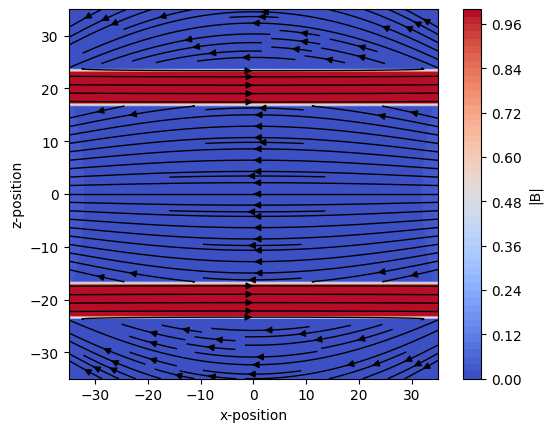

In [4]:

import matplotlib.pyplot as plt
fig, ax = plt.subplots()

# Compute and plot field on x-y grid
grid = np.mgrid[-35:35:100j, -35:35:100j, 0:0:1j].T[0]
X, Y, _ = np.moveaxis(grid, 2, 0)

B = halbach.getB(grid)
Bx, By, _ = np.moveaxis(B, 2, 0)
Bamp = np.linalg.norm(B, axis=2)

pc = ax.contourf(X, Y, Bamp, levels=50, cmap="coolwarm")
ax.streamplot(X, Y, Bx, By, color="k", density=1.5, linewidth=1)

# Add colorbar
fig.colorbar(pc, ax=ax, label="|B|")

# Figure styling
ax.set(
    xlabel="x-position",
    ylabel="z-position",
    aspect=1,
)

plt.show()



In [5]:
halbach.getB([0,0,10])

array([-0.01183528,  0.        ,  0.        ])

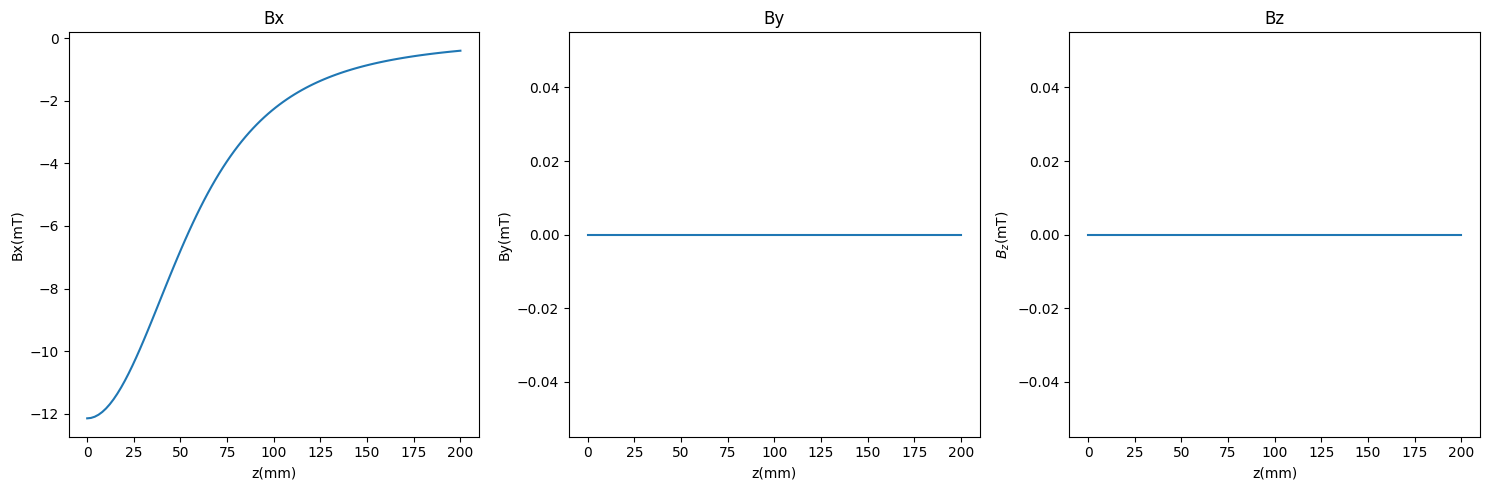

In [6]:
x = np.linspace(0,200,100)
hal_fieldx = []
hal_fieldy = []
hal_fieldz = []
x_p = []
for i in x:
    h = halbach.getB([0,0,i])
    #if h[0]  > 0:
    x_p.append(i)
    hal_fieldx.append(h[0])
    hal_fieldy.append(h[1])
    hal_fieldz.append(h[2])
fig, ax = plt.subplots(1,3,figsize=(15,5))
ax[0].plot(x_p,np.array(hal_fieldx)*1e3)
ax[0].set_title('Bx')
ax[0].set_xlabel('z(mm)')
ax[0].set_ylabel('Bx(mT)')
ax[1].plot(x_p,np.array(hal_fieldy)*1e3)
ax[1].set_title('By')
ax[1].set_xlabel('z(mm)')
ax[1].set_ylabel('By(mT)')
ax[2].plot(x_p,np.array(hal_fieldz)*1e3)
ax[2].set_title('Bz')
ax[2].set_xlabel('z(mm)')
ax[2].set_ylabel('$B_z$(mT)')
plt.tight_layout()
plt.show()

In [146]:
zeeman_prof = magpy.Collection()
n = 5
l =[-24,24,24,-24,24]
ll = ['y','x','y','x','y']
j = 0
angles = np.linspace(0, 360, n, endpoint=False) 
for i in angles:
    cube1= magpy.magnet.Cuboid(
    dimension=(6,6,128),
    polarization=(0,-1.08,0),
    position=(40,1,0))
    cube1.rotate_from_angax(i, 'z', anchor=0)
    cube1.rotate_from_angax(i, 'z')
    cube1.rotate_from_angax(l[j], ll[j],anchor = 0)
    zeeman_prof.add(cube1)
    j = j+1
magpy.show(zeeman_prof, backend='plotly')  

In [ ]:
zeeman_prof = magpy.Collection()
j = 0
n = 4
a = 10
l =[-15,15,15,-15]
l2 = [-24,24,24,-24]
ll = ['y','x','y','x']
mystyle = dict(
    mode="color",
    color=dict(north='red',south = 'blue'))
angles = np.linspace(0, 360, n, endpoint=False)
for i in angles:
    cube1= magpy.magnet.Cuboid(
    dimension=(6,6,128),
    polarization=(0,1.08,0),
    position=(70+a,0,0),
    style_magnetization = mystyle)
    cube2 = magpy.magnet.Cuboid(dimension= (4,4,25),
    polarization=(0,-1.17,0),
    position=(70+a,0,-50))
    cube3= magpy.magnet.Cuboid(
        dimension=(6,6,128),
        polarization=(0,-1.08,0),
        position=(110+a,0,170),
    style_magnetization = mystyle)
    cube4 = magpy.magnet.Cuboid(dimension= (4,4,25),
    polarization=(0,-1.17,0),
    position=(40+a,0,140),
    style_magnetization = mystyle)
    cube5 = magpy.magnet.Cuboid(dimension= (4,4,25),
    polarization=(0,1.17,0),
    position=(30+a,0,240),
    style_magnetization = mystyle)
    cube6 = magpy.magnet.Cuboid(dimension= (4,4,25),
    polarization=(0,1.17,0),
    position=(20+a,0,260),
    style_magnetization = mystyle)
    cube1.rotate_from_angax(i, 'z', anchor=0)
    cube1.rotate_from_angax(i, 'z')
    cube1.rotate_from_angax(l[j], ll[j],anchor=0)
    cube2.rotate_from_angax(i, 'z', anchor=0)
    cube2.rotate_from_angax(i, 'z')
    cube3.rotate_from_angax(i, 'z', anchor=0)
    cube3.rotate_from_angax(i, 'z')
    cube3.rotate_from_angax(l2[j], ll[j],anchor = 0)
    cube4.rotate_from_angax(i, 'z', anchor=0)
    cube4.rotate_from_angax(i, 'z')
    cube5.rotate_from_angax(i, 'z', anchor=0)
    cube5.rotate_from_angax(i, 'z')
    cube6.rotate_from_angax(i, 'z', anchor=0)
    cube6.rotate_from_angax(i, 'z')

    zeeman_prof.add(cube1)
    zeeman_prof.add(cube2)
    zeeman_prof.add(cube3)
    zeeman_prof.add(cube4)
    zeeman_prof.add(cube5)
    zeeman_prof.add(cube6)
    j = j+1
sens = magpy.Sensor([(0,0,0),(0,0,250)])
magpy.show(zeeman_prof)


In [ ]:
cube1= magpy.magnet.Cuboid(
dimension=(6,6,128),
polarization=(0,1.08,0),
position=(70+a,0,0),
style_magnetization = mystyle)
cube2 = magpy.magnet.Cuboid(dimension= (4,4,25),
polarization=(0,-1.17,0),
position=(70+a,0,-50))
cube3= magpy.magnet.Cuboid(
    dimension=(6,6,128),
    polarization=(0,-1.08,0),
    position=(110+a,0,170),
style_magnetization = mystyle)
cube4 = magpy.magnet.Cuboid(dimension= (4,4,25),
polarization=(0,-1.17,0),
position=(40+a,0,140),
style_magnetization = mystyle)
cube5 = magpy.magnet.Cuboid(dimension= (4,4,25),
polarization=(0,1.17,0),
position=(30+a,0,240),
style_magnetization = mystyle)
cube6 = magpy.magnet.Cuboid(dimension= (4,4,25),
polarization=(0,1.17,0),
position=(20+a,0,260),
style_magnetization = mystyle)
magpy.show(zeeman_prof)

IndentationError: unexpected indent (2938878588.py, line 6)

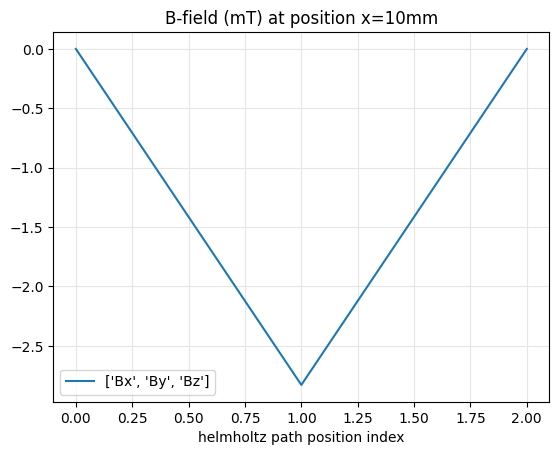

In [220]:
B = magpy.getB(zeeman_prof, (0.01, 0, 0))
plt.plot(
    B * 1000,  # T -> mT
    label=["Bx", "By", "Bz"],
)

plt.gca().set(
    title="B-field (mT) at position x=10mm", xlabel="helmholtz path position index"
)
plt.gca().grid(color=".9")
plt.gca().legend()
plt.show()

Text(0, 0.5, 'mT')

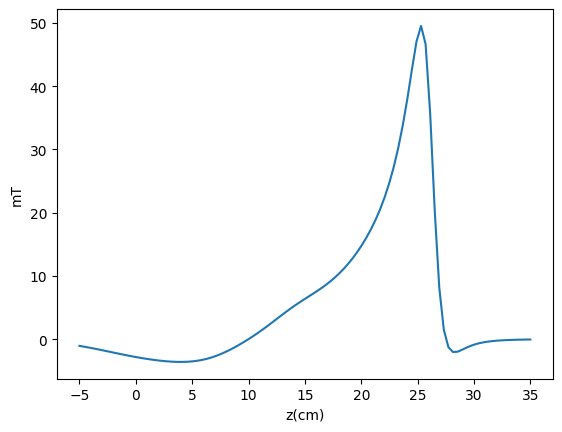

In [223]:
z = np.linspace(-50,350,100)
b_z = []
b_x = []
b_y = []
for i in z:
    b_z.append(zeeman_prof.getB([0,0,i])[1])

    
plt.plot(z/1e1,np.array(b_z)*1e3)
plt.xlabel('z(cm)')
plt.ylabel('mT')